# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree




In [ ]:
data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
# Drop the rows with missing values
data.dropna(inplace = True)
# Drop the "name" column
data.drop('name', axis = 1, inplace = True)


In [ ]:
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2
data['origin'] = data['origin'].factorize()[0]

In [ ]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%

y = data['mpg']
X = data.drop('mpg', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, train_size = 0.8)

In [ ]:
# Fit a decision tree

model = DecisionTreeRegressor().fit(X_train, y_train)

In [ ]:
# Predict on the xtest set
pred_df = X_test.copy()
pred_df['predictions'] = model.predict(X_test)
pred_df


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,predictions
79,4,96.0,69.0,2189,18.0,72,2,23.0
276,4,121.0,115.0,2795,15.7,78,2,19.0
248,4,91.0,60.0,1800,16.4,78,1,39.0
56,4,91.0,70.0,1955,20.5,71,0,33.0
393,4,140.0,86.0,2790,15.6,82,0,27.0
...,...,...,...,...,...,...,...,...
366,6,225.0,85.0,3465,16.6,81,0,20.8
83,4,98.0,80.0,2164,15.0,72,0,24.0
115,8,350.0,145.0,4082,13.0,73,0,13.0
3,8,304.0,150.0,3433,12.0,70,0,18.0


In [ ]:
# Print out the R2 score.

print("Score du set d'entrainement : ", model.score(X_train, y_train))
print("Score du set de test: ", model.score(X_test, y_test))

Score du set d'entrainement :  1.0
Score du set de test:  0.7832600855366167


In [ ]:
# Print each feature with importance %
for i, j in zip(X.columns, model.feature_importances_):
  print(f'Importance de la feature {i}: {round(j * 100, 2)}%')


Importance de la feature cylinders: 0.38%
Importance de la feature displacement: 63.05%
Importance de la feature horsepower: 17.03%
Importance de la feature weight: 6.44%
Importance de la feature acceleration: 2.41%
Importance de la feature model_year: 10.41%
Importance de la feature origin: 0.28%


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


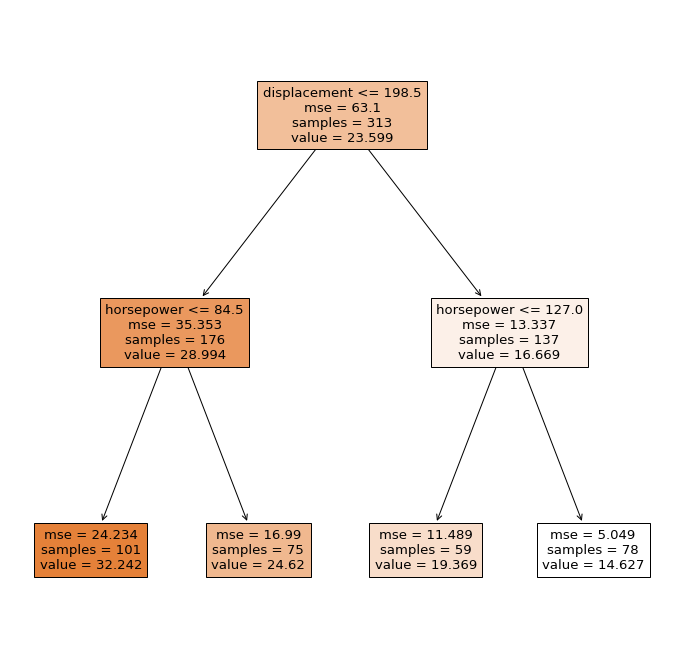

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
model_plot =  DecisionTreeRegressor(max_depth= 2).fit(X_train, y_train)

plt.figure(figsize=(12,12))
plot_tree(model_plot, filled = True, class_names = model_plot.classes_,
          feature_names = X_train.columns)
plt.show()

## Classification Trees

In [ ]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')
data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
data['species'] = data['species'].factorize()[0]

# Turn the island column into numeric
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2
data['island'] = data['island'].factorize()[0]


In [ ]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets
y = data['sex']
X = data.drop('sex', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [ ]:
# Using a random state of 42, fit the classification tree.
model = DecisionTreeClassifier().fit(X_train, y_train)


In [ ]:
# Print the predictions on the test set
pred_df = X_test.copy()
pred_df['predictions'] = model.predict(X_test)
pred_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,predictions
30,0,2,39.5,16.7,178.0,3250.0,Female
317,2,1,46.9,14.6,222.0,4875.0,Female
79,0,0,42.1,19.1,195.0,4000.0,Male
201,1,2,49.8,17.3,198.0,3675.0,Female
63,0,1,41.1,18.2,192.0,4050.0,Male
...,...,...,...,...,...,...,...
288,2,1,43.5,14.2,220.0,4700.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
83,0,0,35.1,19.4,193.0,4200.0,Female
319,2,1,51.1,16.5,225.0,5250.0,Male


In [ ]:
# Print the accuracy score for the predictions
print("Score du set de test: ", model.score(X_test, y_test))


Score du set de test:  0.8656716417910447


In [ ]:
# Print each feature with importance %
for i, j in zip(X.columns, model.feature_importances_):
  print(f'Importance de la feature {i}: {round(j * 100, 2)}%')


Importance de la feature species: 0.0%
Importance de la feature island: 0.0%
Importance de la feature bill_length_mm: 10.09%
Importance de la feature bill_depth_mm: 47.8%
Importance de la feature flipper_length_mm: 2.33%
Importance de la feature body_mass_g: 39.78%


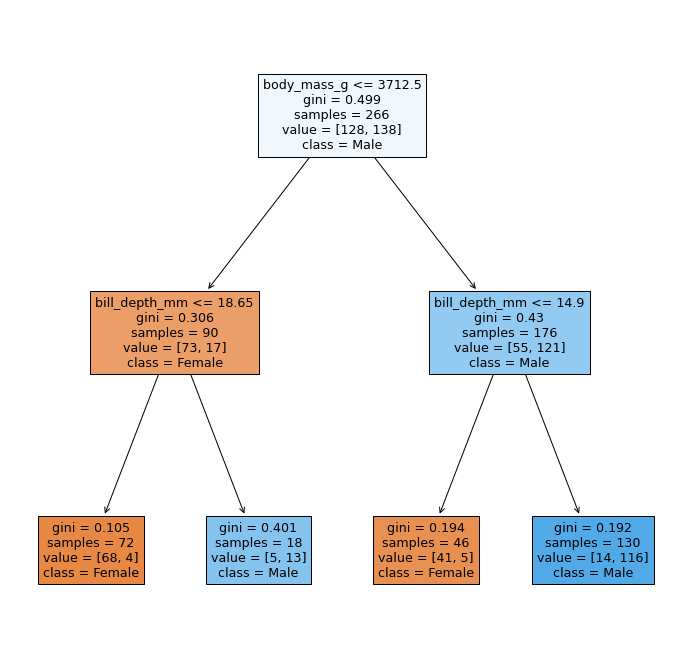

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
model_plot = DecisionTreeClassifier(max_depth= 2).fit(X_train, y_train)
plt.figure(figsize=(12,12))
plot_tree(model_plot, filled=True, class_names = model_plot.classes_, feature_names = X_train.columns)
plt.show()

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

list_of_accuracies = []
for i in range(1, 11):
  model = DecisionTreeClassifier(max_depth= i).fit(X_train, y_train)
  model.predict(X_test)
  list_of_accuracies.append(model.score(X_test, y_test))

print(list_of_accuracies)


[0.7014925373134329, 0.8208955223880597, 0.835820895522388, 0.8507462686567164, 0.8656716417910447, 0.8507462686567164, 0.8507462686567164, 0.8805970149253731, 0.8507462686567164, 0.8656716417910447]


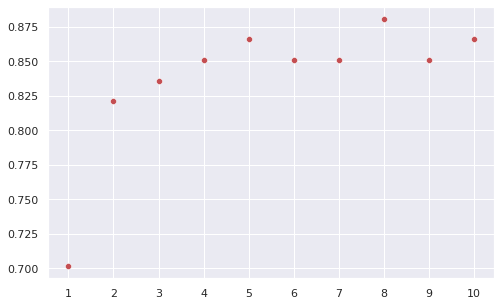

In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
sns.set_theme()
plt.figure(figsize=(8,5))
sns.scatterplot(x = [1,2,3,4,5,6,7,8,9,10], y = list_of_accuracies, color = 'r')
plt.xticks(range(1,11,1))
plt.show()